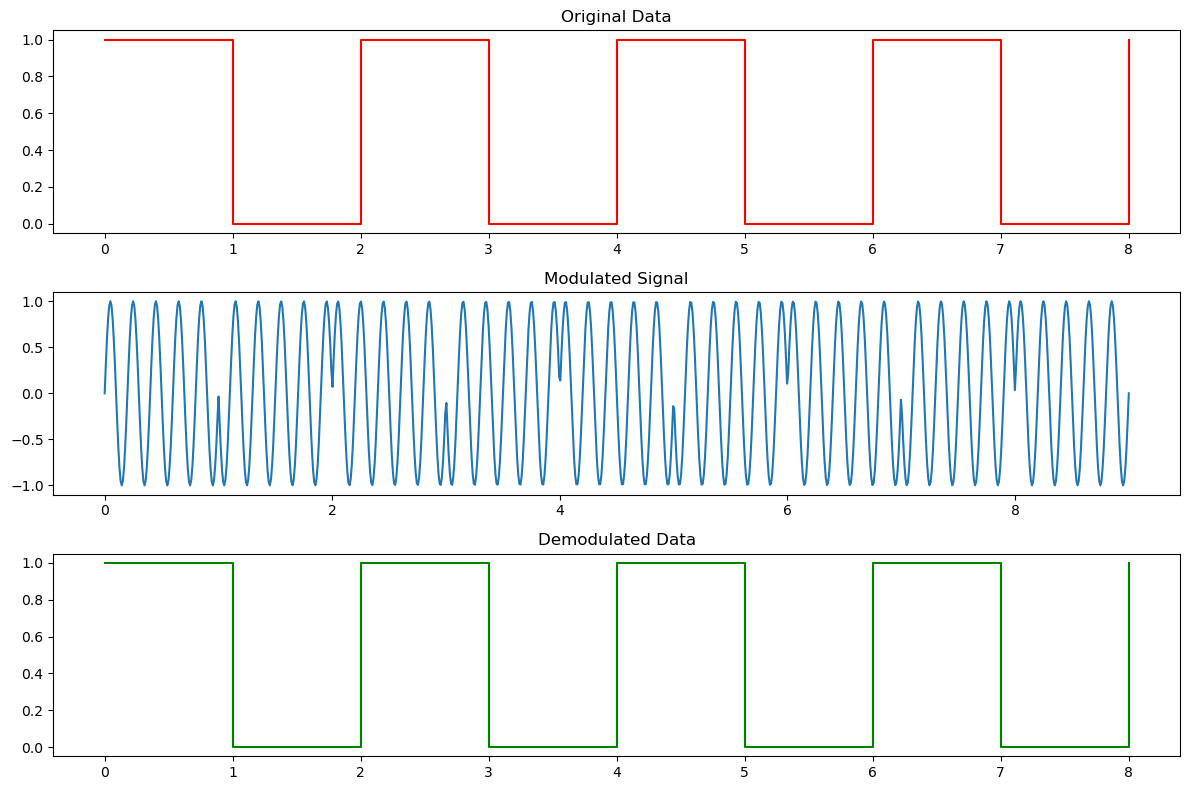

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
carrier_freq = 5    # Carrier frequency (Hz)
bit_rate = 1         # Bit rate (bits per second)
num_bits = 9         # Number of bits
message_signal = [1, 0, 1, 0, 1, 0, 1, 0, 1]  # Original digital signal

# Generate time array
t = np.linspace(0, num_bits / bit_rate, num_bits * 100)

# BPSK Modulation
carrier_wave = np.sin(2 * np.pi * carrier_freq * t)
modulated_signal = np.zeros(len(t))

for i, bit in enumerate(message_signal):
    amplitude = 1 if bit == 1 else -1  # Amplitude is 1 for bit 1, -1 for bit 0
    modulated_signal[i*100:(i+1)*100] = amplitude * carrier_wave[i*100:(i+1)*100]

# BPSK Demodulation
demodulated_signal = np.zeros(num_bits)
for i in range(num_bits):
    demodulated_signal[i] = np.sum(modulated_signal[i*100:(i+1)*100] * carrier_wave[i*100:(i+1)*100])

# Convert to binary data
received_data = np.where(demodulated_signal > 0, 1, 0)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.step(np.arange(num_bits), message_signal, 'r', where='post')
plt.title('Original Data')

plt.subplot(3, 1, 2)
plt.plot(t, modulated_signal)
plt.title('Modulated Signal')


plt.subplot(3, 1, 3)
plt.step(np.arange(num_bits), received_data, 'g', where='post')
plt.title('Demodulated Data')

plt.tight_layout()
plt.show()
